<a href="https://colab.research.google.com/github/melzabe/skripsi_melza/blob/main/fb_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 33.3 MB/s 
     |████████████████████████████████| 1.8 MB 92.3 MB/s 
     |████████████████████████████████| 9.9 MB 84.7 MB/s 
     |████████████████████████████████| 78 kB 7.9 MB/s 
     |████████████████████████████████| 569 kB 81.1 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 798 kB 70.7 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 11.2 MB 81.7 MB/s 
     |████████████████████████████████| 1.6 MB 60.1 MB/s 
     |████████████████████████████████| 965 kB 60.0 MB/s 
     |████████████████████████████████| 529 kB 77.2 MB/s 
     |████████████████████████████████| 87 kB 8.9 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115940 sha256=01bb9b6d23a3d81631da75e76d06ff9b574a1e066f6722a1322d87ffcc123164
 

In [7]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from darts import TimeSeries
from darts.models import Prophet
import matplotlib.pyplot as plt
import warnings;
warnings.simplefilter('ignore')

In [8]:
# Read a pandas DataFrame
df = pd.read_csv('C:/Users/user/Documents/PROPHET/kasus_aktif.csv', delimiter=",")
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
#df.isnull().sum()

FileNotFoundError: ignored

In [ ]:
df.describe

<bound method NDFrame.describe of              ds     y
0    02/03/2020     2
1    03/03/2020     2
2    04/03/2020     2
3    05/03/2020     2
4    06/03/2020     4
..          ...   ...
652  15/12/2021  4864
653  16/12/2021  4833
654  17/12/2021  4912
655  18/12/2021  4918
656  19/12/2021  4923

[657 rows x 2 columns]>

In [ ]:
#object to datetime
df['ds'] = pd.to_datetime(df['ds'], format='%d/%m/%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      657 non-null    datetime64[ns]
 1   y       657 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.4 KB


In [ ]:
series = TimeSeries.from_dataframe(df, 'ds', 'y', fill_missing_dates=True, freq="D")

In [ ]:
series

<TimeSeries (DataArray) (ds: 658, component: 1, sample: 1)>
array([[[2.00000e+00]],

       [[2.00000e+00]],

       [[2.00000e+00]],

       [[2.00000e+00]],

       [[4.00000e+00]],

       [[4.00000e+00]],

       [[6.00000e+00]],

       [[1.90000e+01]],

       [[2.70000e+01]],

       [[        nan]],

...

       [[5.15400e+03]],

       [[5.18600e+03]],

       [[5.15800e+03]],

       [[5.06400e+03]],

       [[4.90500e+03]],

       [[4.86400e+03]],

       [[4.83300e+03]],

       [[4.91200e+03]],

       [[4.91800e+03]],

       [[4.92300e+03]]])
Coordinates:
  * ds         (ds) datetime64[ns] 2020-03-02 2020-03-03 ... 2021-12-19
  * component  (component) object 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

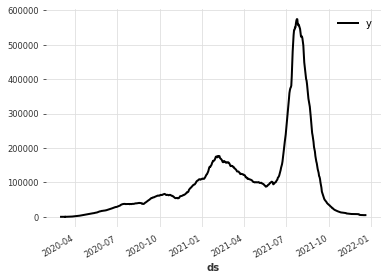

In [ ]:
series.plot()

In [ ]:
train, test = series.split_after(0.7)

In [ ]:
len(train), len(test)

(460, 198)

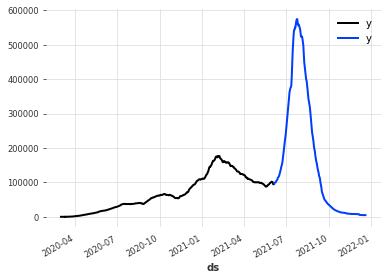

In [ ]:
train.plot()
test.plot()

In [ ]:
model = Prophet()
model.fit(train)


2022-11-13 21:44:57 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-13 21:44:58 cmdstanpy DEBUG: TBB already found in load path
2022-11-13 21:44:58 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-11-13 21:44:58 prophet INFO: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-11-13 21:44:58 cmdstanpy DEBUG: input tempfile: C:\Users\user\AppData\Local\Temp\tmp47uvzms6\dfmsv002.json
2022-11-13 21:44:58 cmdstanpy DEBUG: input tempfile: C:\Users\user\AppData\Local\Temp\tmp47uvzms6\iyviy8_s.json
2022-11-13 21:44:58 cmdstanpy DEBUG: idx 0
2022-11-13 21:44:58 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-13 21:44:58 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\user\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=60980', 'data', 'file=C:\\Users\\user\\AppData\\Local\\Temp\\tmp47uvzms6\\dfmsv002.json', 'init=C:\\Users\\user\\AppData\

In [ ]:
train

<TimeSeries (DataArray) (ds: 460, component: 1, sample: 1)>
array([[[2.00000e+00]],

       [[2.00000e+00]],

       [[2.00000e+00]],

       [[2.00000e+00]],

       [[4.00000e+00]],

       [[4.00000e+00]],

       [[6.00000e+00]],

       [[1.90000e+01]],

       [[2.70000e+01]],

       [[        nan]],

...

       [[9.61870e+04]],

       [[9.84050e+04]],

       [[9.87040e+04]],

       [[9.96900e+04]],

       [[1.01639e+05]],

       [[1.02006e+05]],

       [[1.01325e+05]],

       [[1.00364e+05]],

       [[9.44380e+04]],

       [[9.47730e+04]]])
Coordinates:
  * ds         (ds) datetime64[ns] 2020-03-02 2020-03-03 ... 2021-06-04
  * component  (component) object 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
# ini utk yg predict 1 hari ke depan

L = train # 460
prediction = []
y_true = []
for i in range(len(test)):
    train = series[:L]
    model = Prophet()
    model.fit(train)
    y_cap = model.predict(1)
    prediction.append(y_cap)
    y_true.append(series[L])
    L = L+1
    
#yg harus dilakukan    
#1.Change y_cap & y_true dari list ke Dart Timeseries
#2.Plot
#3.Hitung rmse dan MAPE

2022-11-13 21:31:06 darts.timeseries ERROR: IndexError: The type of your index was not matched.


IndexError: The type of your index was not matched.

In [ ]:
# Teacher Forced Forecasting Technique
hari = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

L = train # 460
prediction = {}
y_true = []
for j in hari:
    prediction[j] = []
    for i in range(0, len(test), j):
        train = series[:L] # ini maksudnya cuma slice biasa aja kayak di List atau array
        model = Prophet()
        model.fit(train)
        y_cap = model.predict(j)
        prediction[j].append(y_cap)
        L = L+j
        if i==1:
            y_true.append(series[L])
        del model


2022-11-13 21:31:23 darts.timeseries ERROR: IndexError: The type of your index was not matched.


IndexError: The type of your index was not matched.

In [ ]:
# Multiple Step Forecasting Technique
hari = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

L = size(train) # 460
prediction = {}
y_true = []
for j in hari:
    prediction[j] = []
    train = series[:L]
    for i in range(0, len(test), j):
        model = Prophet()
        model.fit(train)
        y_cap = model.predict(j)
        prediction[j].append(y_cap)
        train = train + [y_cap] # tapi most likely ini error syntax
        if i==1:
            y_true.append(series[L])
        del model

NameError: name 'size' is not defined

In [ ]:
prediction = model.predict(len(test))
#prediction = model.predict(len(test))

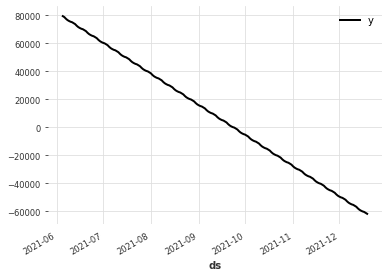

In [ ]:
prediction.plot()

Text(0.5, 0, 'Year')

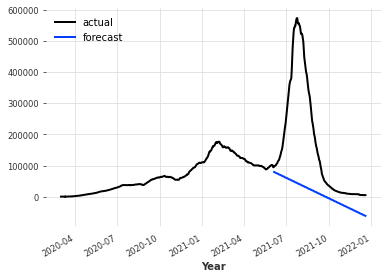

In [ ]:
import matplotlib.pyplot as plt

series.plot(label='actual')
prediction.plot(label='forecast')
plt.legend()
plt.xlabel('Year')

# Evaluating Models

In [ ]:
from darts.metrics import mape
score1 = mape(test, prediction)

In [ ]:
score1

266.0515914479747

In [ ]:
from darts.metrics import rmse
score2 = rmse(test, prediction, train)

2022-11-13 21:46:53 main_logger ERROR: ValueError: The intersect parameter must be a bool


ValueError: The intersect parameter must be a bool

In [ ]:
score2

nan